In [1]:
from DBQuerier import DBQuerier

import os

import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set(style="ticks")
import ast

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline
fft_interval = 5.13980000
from crawlab_toolbox import plotting as genplt
from scipy import signal

In [2]:
querier = DBQuerier('db18','MMM-EMCO-E350')

In [3]:
query = """SELECT RMS.sensorId, 
        RMS.dateTime AS dateTime, 
        RMS.values AS vals, 
        VibrationState.values as vibState,
        VibrationState.programName as programName
        FROM db18.RMS
        LEFT JOIN db18.VibrationState ON 
        db18.VibrationState.dateTime = db18.RMS.dateTime 
        where exists 
            (SELECT VibrationState.values from db18.VibrationState WHERE VibrationState.dateTime = RMS.dateTime)
        and VibrationState.PCAFit IS NULL 
        and RMS.assetId = 'MMM-EMCO-E350'
           and VibrationState.programName like '%WARMUP%'  and VibrationState.values like '1000RPM%'  and VibrationState.dateTime > '2020-01-1' 
        order by RMS.dateTime asc ;"""

In [4]:
cursor = querier.execute_query(query)
data = cursor.fetchall()

In [5]:
sensorId = np.array([[data[i][0] for i in range(len(data))]]).T
dateTime = [data[i][1] for i in range(len(data))]
values = np.array([[data[i][2] for i in range(len(data))]]).T
vibState = np.array([[data[i][3] for i in range(len(data))]]).T
programName= np.array([[data[i][4] for i in range(len(data))]]).T


In [6]:
# dateTime = np.array([(dateTime[i] - dateTime[0]).total_seconds()/60/60/24 for i in range(len(dateTime))])

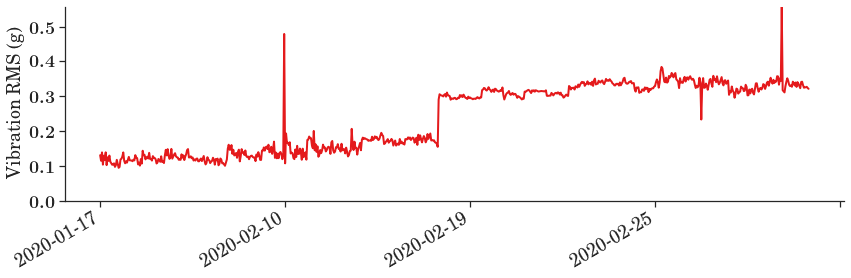

In [8]:
# combine the responses and labels to put on our 2D plot
responses = np.vstack((values))
labels = [r'']

# Create a 2D plot
genplt.plot_timeseries(np.array(dateTime), # X - coordinate on the plot
              responses,# Y - coordinates on the plot
              labels,# Labels for the plot legend
              '',# X - axis label
              'Vibration RMS (g)',   # Y - axis label
              filename='Warmup_RMS_History',   # Plot filename
              folder='figures',    # Specify the folder where the filename will be saved
              num_col=2,    # Specify the number of columns in the legend
              legend_loc='best', # Specify the location of the legend
              ymax=0.0,
                     ymin=0.05,
              transparent=True,
              showplot=True,
              save_plot=True,
              template='wide',
              file_type='png'
             )